# Casos confirmados de Covid-19

In [28]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima, ADFTest
#from pmdarima.arima import ADFTest
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x180560de940>)

In [2]:
df_covid = pd.read_csv('casosGlobalCovid.csv')

In [3]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756


In [4]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1441,1451,1454,1456,1465,1474,1482,1494,1497,1504
268,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,133093,134310,135459,136736,138004,139223,140287,141219,142228,143169
269,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2094,2096,2096,2097,2099,2101,2101,2101,2101,2101
270,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,19834,19943,20177,20462,20725,20997,21230,21582,21993,22645


In [5]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105
1,NaN,Albania,0,0,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756


In [6]:
df_pais = df_covid.groupby('Paises').sum()
df_pais

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105
Albania,0,0,0,0,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283
Algeria,0,0,0,0,0,0,0,0,0,0,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873
Andorra,0,0,0,0,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308
Angola,0,0,0,0,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1441,1451,1454,1456,1465,1474,1482,1494,1497,1504
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,133093,134310,135459,136736,138004,139223,140287,141219,142228,143169
Yemen,0,0,0,0,0,0,0,0,0,0,...,2094,2096,2096,2097,2099,2101,2101,2101,2101,2101


In [8]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values

In [9]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/27/20', '12/28/20', '12/29/20', '12/30/20', '12/31/20', '1/1/21',
       '1/2/21', '1/3/21', '1/4/21', '1/5/21'],
      dtype='object', length=350)

In [10]:
cases

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87

<BarContainer object of 350 artists>

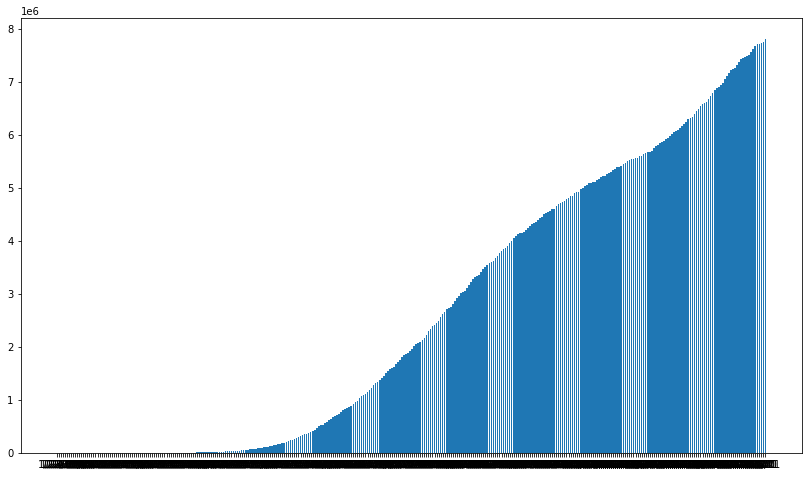

In [12]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [13]:
dados_Brasil = df_pais.loc['Brazil']

In [14]:
dados_Brasil

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
1/1/21     7700578
1/2/21     7716405
1/3/21     7733746
1/4/21     7753752
1/5/21     7810400
Name: Brazil, Length: 350, dtype: int64

# Eliminando números de caso "0"

In [15]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil

2/26/20          1
2/27/20          1
2/28/20          1
2/29/20          2
3/1/20           2
            ...   
1/1/21     7700578
1/2/21     7716405
1/3/21     7733746
1/4/21     7753752
1/5/21     7810400
Name: Brazil, Length: 315, dtype: int64

In [16]:
dados_Brasil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '12/27/20', '12/28/20', '12/29/20', '12/30/20', '12/31/20', '1/1/21',
       '1/2/21', '1/3/21', '1/4/21', '1/5/21'],
      dtype='object', length=315)

In [17]:
dados_Brasil.values

array([      1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87187,   92202,   97100,  101826,  108620,  115455,
        126611,  135773,  146894,  156061,  162699,  169594,  178214,
        190137,  203165,  220291,  233511,  241080,  255368,  271885,
        291579,  310087,  330890,  347398,  363211,  374898,  391222,
        411821,  438238,  465166,  498440,  514849,  526447,  555383,
        584016,  614

Text(0, 0.5, 'Valor em milhões')

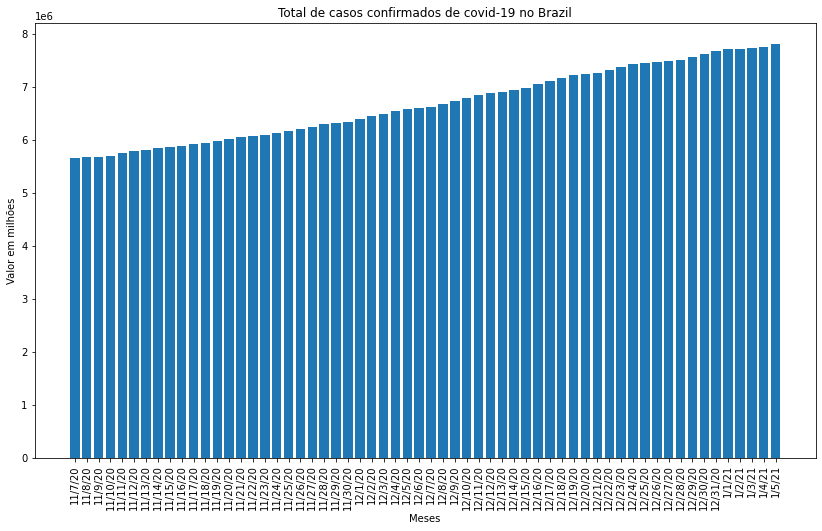

In [18]:
tam = len(dados_Brasil)

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(dados_Brasil.index[tam-60:tam], dados_Brasil.values[tam-60:tam])
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

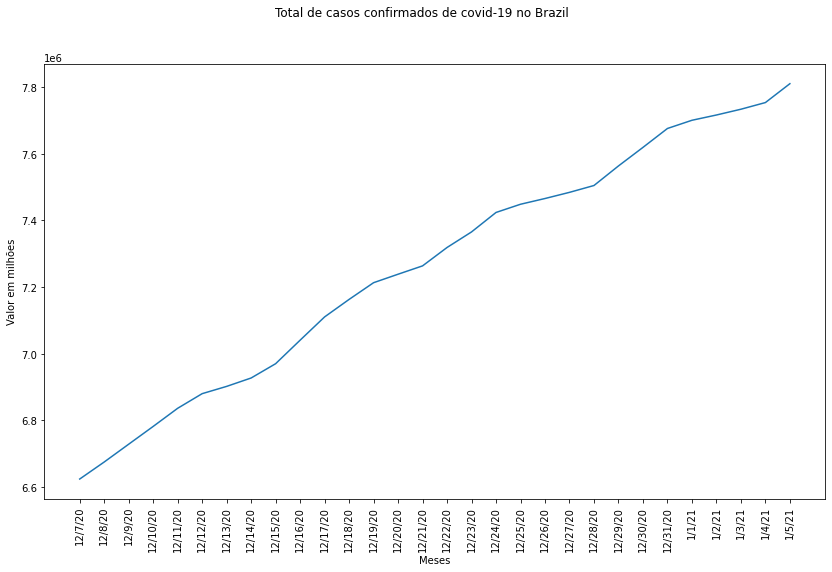

In [19]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.plot(dados_Brasil.index[tam-30:tam], dados_Brasil.values[tam-30:tam])
plt.suptitle('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [20]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [21]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [19]:
dados_Brasil_dois.isnull().sum()

data        0
Eswatini    0
dtype: int64

In [21]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [22]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [23]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [24]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [26]:
ts = dados_Brasil_dois['Brazil']
ts.head()

0    1
1    1
2    1
3    2
4    2
Name: Brazil, dtype: int64

- Depois de ter feito todos os paços a melhor opção é colocar tudo isso dentro de uma função para otimização de código

In [27]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    dados = dados['Brazil']
    return dados

In [28]:
ts = trans_data(dados_Brasil)
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [29]:
decomposicao = seasonal_decompose(ts)

In [30]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2021-01-01    7.680458e+06
2021-01-02    7.715722e+06
2021-01-03             NaN
2021-01-04             NaN
2021-01-05             NaN
Name: trend, Length: 315, dtype: float64

In [31]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26    -2051.631664
2020-02-27     4469.491713
2020-02-28     8304.455999
2020-02-29     9856.280241
2020-03-01     -652.469326
                  ...     
2021-01-01     8304.455999
2021-01-02     9856.280241
2021-01-03     -652.469326
2021-01-04   -11368.229066
2021-01-05    -8557.897897
Name: seasonal, Length: 315, dtype: float64

In [32]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    -9855.851670
2020-03-01      652.469326
                  ...     
2021-01-01    11815.686858
2021-01-02    -9173.280241
2021-01-03             NaN
2021-01-04             NaN
2021-01-05             NaN
Name: resid, Length: 315, dtype: float64

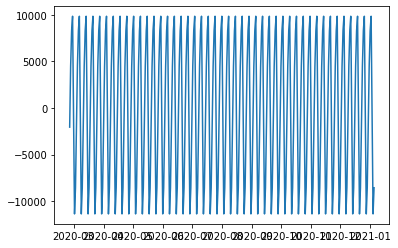

In [33]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

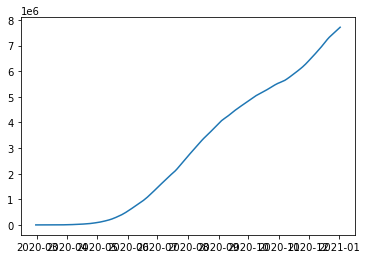

In [34]:
plt.plot(tendencia)

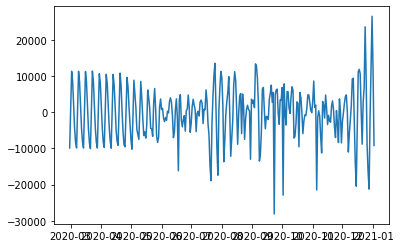

In [35]:
plt.plot(aleatorio)

- Ou podemos exibir tudo de uma unica vez

In [36]:
decomp = seasonal_decompose(ts,freq=20)

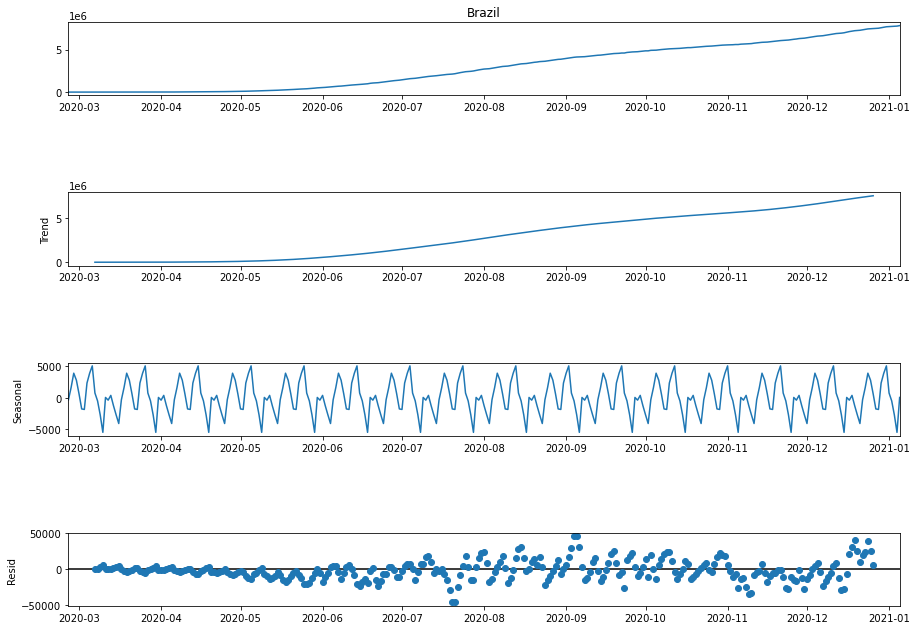

In [37]:
fig = decomp.plot()
fig.set_size_inches(15,10)

In [39]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  314
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3378.412
Method:                       css-mle   S.D. of innovations          11340.864
Date:                Wed, 06 Jan 2021   AIC                           6768.823
Time:                        17:07:58   BIC                           6791.320
Sample:                    02-27-2020   HQIC                          6777.813
                         - 01-05-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.63e+04        nan        nan        nan         nan         nan
ar.L1.D.Brazil     1.0394      0.153      6.794      0.000       0.740       1.339
ar.L2.D.Brazil    -0.0418      0.153     -0.274      0.784      -0.341       0.258
ma.L1.D.Brazil    -0.6059      0.144     -4.194      0.000      -0.889      -0.323
ma.L2.D.Brazil    -0.2585      0.124     -2.090      0.037      -0.501      -0.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2           23.8498           +0.0000j           23.8498            0.0000
MA.1            1.1176           +0.0000j            1.1176            0.0000
MA.2           -3.4613           +0.0000j            3.4613            0.5000
-----------------------------------------------------------------------------
"""

In [40]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([7855289.97185381, 7892849.6064696 , 7930099.62472205,
       7967334.40514371, 8004566.29643128, 8041795.82199578,
       8079023.00940993, 8116247.86544224, 8153470.39597487,
       8190690.60683877])

Text(0, 0.5, 'Valor em milhões')

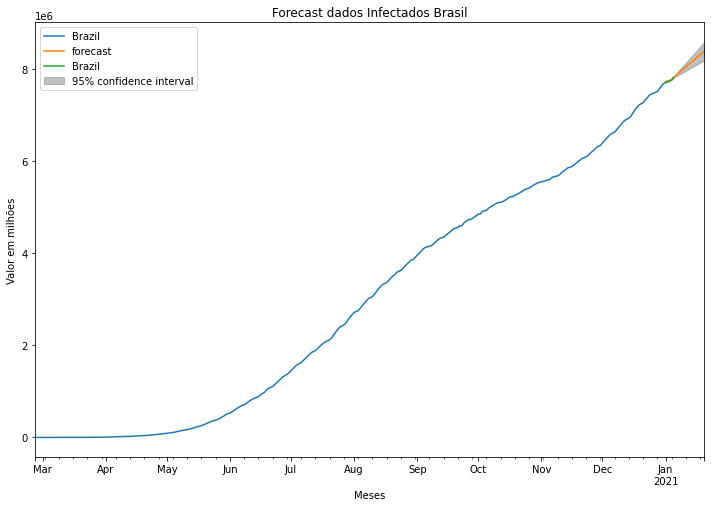

In [41]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(12, 8))
modelo_treinado.plot_predict('2021-01-01', '2021-01-20', ax = eixo, plot_insample = True)
plt.title('Forecast dados Infectados Brasil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

- Podemos também incrementar ainda mais nossa função para ficar mais robusta

In [29]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    ts = dados['Brazil']
    adf_test = ADFTest(alpha = 0.05)
    adf_test.should_diff(ts)
    modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit(disp=False)
    eixo = ts.plot(figsize=(12, 8))
    modelo_treinado.plot_predict('2021-01-01', '2021-01-20', ax = eixo, plot_insample = True)
    plt.title('Forecast dados Infectados Brasil')
    plt.xlabel('Meses')
    plt.ylabel('Valor em milhões')
    return modelo_treinado

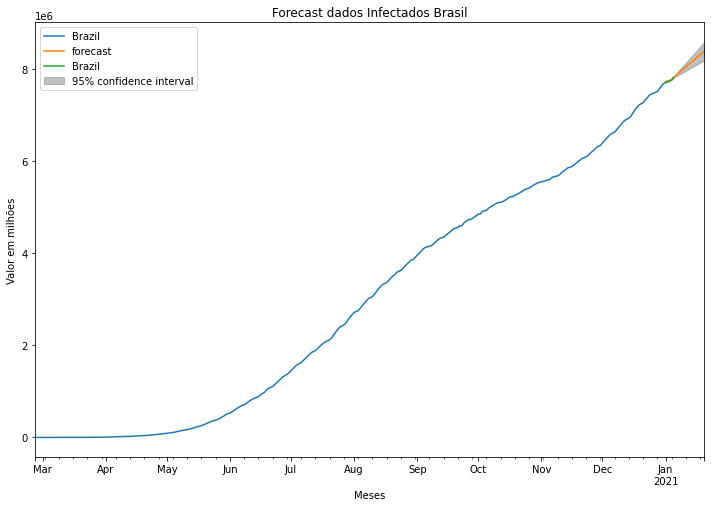

In [30]:
data = trans_data(dados_Brasil)
data

# Nova analise com o métedo auto_ARIMA

In [31]:
def autoArima(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    return dados

In [32]:
Brasil = autoArima(dados_Brasil)
Brasil

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2
...,...
2021-01-01,7700578
2021-01-02,7716405
2021-01-03,7733746


In [33]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Brasil)

(nan, False)

In [34]:
Brasil.shape

(315, 1)

In [35]:
train = Brasil[:285]
test = Brasil[-30:]

In [36]:
train.tail()

,Brazil
data,
2020-12-02,6436650
2020-12-03,6487084
2020-12-04,6533968
2020-12-05,6577177
2020-12-06,6603540


In [37]:
test.head()

,Brazil
data,
2020-12-07,6623911
2020-12-08,6674999
2020-12-09,6728452
2020-12-10,6781799
2020-12-11,6836227


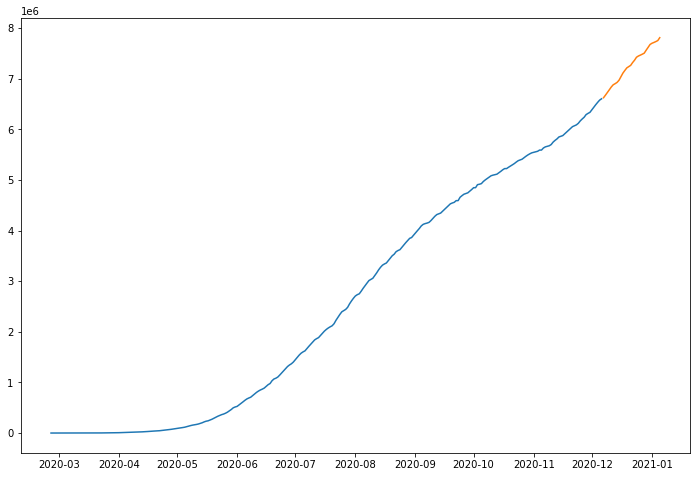

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)

In [39]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6056.432, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5981.677, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5961.545, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6036.669, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5960.909, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5982.831, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5955.697, Time=0.61 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5954.975, Time=0.50 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5954.602, Time=0.92 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=5952.802, Time=1.96 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=5953.202, Time=3.19 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=5954.303, Time=2.88 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=5955.608, Time=2.05 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=5949.585, Time=9.87 sec
 ARIMA(0,1,1)(5,1,2

In [40]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  285
Model:             SARIMAX(5, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -2892.772
Date:                              Sat, 09 Jan 2021   AIC                           5807.544
Time:                                      19:36:23   BIC                           5847.208
Sample:                                           0   HQIC                          5823.468
                                              - 285                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6483      0.215      7.678      0.000       1.228       2.069
ar.L2         -1.3065      0.372     -3.509      0.000      -2.036      -0.577
ar.L3          0.5264      0.365      1.444      0.149      -0.188       1.241
ar.L4         -0.2610      0.301     -0.867      0.386      -0.851       0.329
ar.L5          0.3612      0.167      2.166      0.030       0.034       0.688
ma.L1         -1.6121      0.214     -7.550      0.000      -2.031      -1.194
ma.L2          1.3731      0.277      4.957      0.000       0.830       1.916
ma.L3         -0.3714      0.197     -1.887      0.059      -0.757       0.014
ar.S.L12      -0.2245      0.149     -1.507      0.132      -0.516       0.067
ma.S.L12      -0.8256      0.091     -9.052      0.000      -1.004      -0.647
sigma2      1.718e+08   2.68e-09   6.42e+16      0.000    1.72e+08    1.72e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               170.98
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              12.14   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.99e+32. Standard errors may be unstable.
"""

In [42]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 30),index=test.index)
prediction.columns = ['brasil']
prediction.head()

,brasil
data,
2020-12-07,6.632932e+06
2020-12-08,6.672292e+06
2020-12-09,6.714459e+06
2020-12-10,6.760478e+06
2020-12-11,6.802069e+06


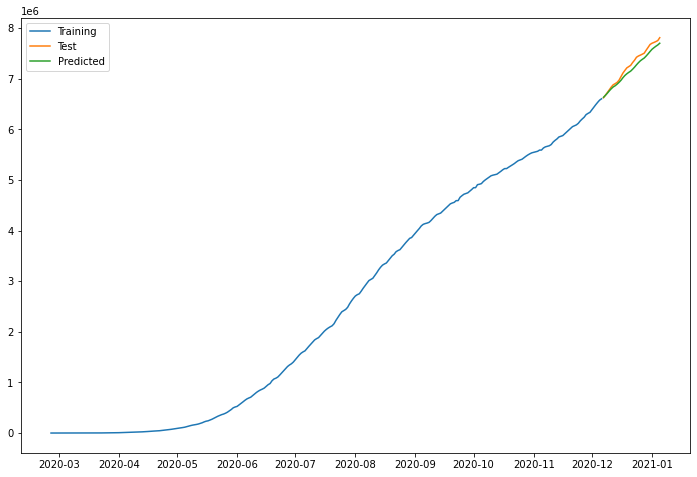

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [44]:
from sklearn.metrics import r2_score
test['brasil'] = prediction
r2_score(test['Brazil'], test['brasil'])

0.9254239315304919

- Modelo mais simples

In [ ]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

In [70]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([7868215.02732431, 7916337.41068554, 7947345.8999745 ,
       7964539.365146  , 7978561.18731086, 8009226.93807772,
       8059892.86949389, 8117785.09320706, 8166228.63192082,
       8196300.23409006])

# Reset para exportar dados

In [71]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105
1,Albania,0,0,0,0,0,0,0,0,0,...,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283
2,Algeria,0,0,0,0,0,0,0,0,0,...,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873
3,Andorra,0,0,0,0,0,0,0,0,0,...,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308
4,Angola,0,0,0,0,0,0,0,0,0,...,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,2,2,2,2,2,2,2,2,...,1441,1451,1454,1456,1465,1474,1482,1494,1497,1504
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,133093,134310,135459,136736,138004,139223,140287,141219,142228,143169
188,Yemen,0,0,0,0,0,0,0,0,0,...,2094,2096,2096,2097,2099,2101,2101,2101,2101,2101
189,Zambia,0,0,0,0,0,0,0,0,0,...,19834,19943,20177,20462,20725,20997,21230,21582,21993,22645


In [72]:
df_pais.to_csv('dadosCovidPaises.csv')